# HIV Model

##### Olivia Seitelman

In [3]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

R    1
L    1
E    1
V    1
dtype: int64


,values
gamma,1.36000
mu,0.00136
tau,0.20000
beta,0.00027
p,0.10000
alpha,0.03600
sigma,2.00000
delta,0.33000
pi,100.00000
t_0,0.00000


In [54]:
def make_system(gamma, mu, tau, beta, p, alpha, sigma, delta, pi, dt):
    """Make a system object for the SIR model.
    
    beta: contact rate in days
    gamma: recovery rate in days
    
    returns: System object
    """
    init = State(R=200, L=0, E=0, V=100)
    #init /= np.sum(init)

    t0 = 0
    t_end = 120


    return System(init=init, t0=t0, t_end=t_end, t_prev=t_prev, t_current=t_current,
               gamma=gamma, mu=mu, tau=tau, beta=beta, p=p, alpha=alpha, sigma=sigma, delta=delta, pi=pi, dt=dt)

In [55]:
def update_func(state, t, system):
    """Update the HIV model.
    
    state: State (R, L, E, V)
    t: time
    system: System object
    
    returns: State (hiv)
    """
    R, L, E, V = state
    unpack(system)

    dR_dt = gamma*tau - mu*R - beta*R*V
    dL_dt = p*beta*R*V - mu*L - alpha*L
    dE_dt = (1-p)*beta*R*V + alpha*L -delta*E
    dV_dt = pi*E - sigma*V
    
    
    R = R + dR_dt*dt
    L = L + dL_dt*dt
    E = E + dE_dt*dt
    V = V + dV_dt*dt
    
    return State(R=R, L=L, E=E, V=V)

In [56]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
        
    system: System object
    update_func: function that updates state
    
    returns: TimeFrame
    """
    unpack(system)
    
    frame = TimeFrame(columns=init.index)
    frame.row[t0] = init
    
    for t in linrange(t0, t_end):
        frame.row[t+1] = update_func(frame.row[t], t, system)
    
    return frame

In [57]:
system = make_system(1.36, 1.36e-3, .2, .00027, .1, 3.6e-2, 2, .33, 100, .25)


results = run_simulation (system, update_func)
results.head()

,R,L,E,V
0,200,0,0,100
1,198.65,0.135,1.215,50
2,197.98,0.200783,1.71938,55.375
3,197.241,0.272909,2.24535,70.6719
4,196.301,0.364451,2.90938,91.4696


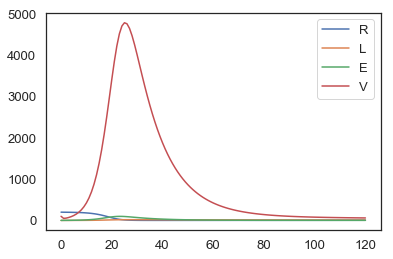

In [58]:
results.plot()